In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# pull the latest data from the Zurich Hospital Github
! rm 'covid19_cases_switzerland_openzh.csv'
! wget 'https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland_openzh.csv'

--2020-10-17 12:52:55--  https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland_openzh.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 151.101.120.133
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|151.101.120.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 38159 (37K) [text/plain]
Sauvegarde en : « covid19_cases_switzerland_openzh.csv »

covid19_cases_switz 100%[===================>]  37,26K  --.-KB/s    in 0,03s   

2020-10-17 12:52:56 (1,24 MB/s) — « covid19_cases_switzerland_openzh.csv » sauvegardé [38159/38159]



In [3]:
# get the data from the github to pandas
covid_19_cases = pd.read_csv("covid19_cases_switzerland_openzh.csv")

In [4]:
# A quick look at the structure of the data (first row)
print(covid_19_cases.head(3))

         Date   AG  AI  AR  BE  BL   BS  FR   GE  GL  ...  SO  SZ  TG   TI  \
0  2020-02-25  NaN NaN NaN NaN NaN  NaN NaN  0.0 NaN  ... NaN NaN NaN  0.0   
1  2020-02-26  1.0 NaN NaN NaN NaN  NaN NaN  1.0 NaN  ... NaN NaN NaN  1.0   
2  2020-02-27  1.0 NaN NaN NaN NaN  1.0 NaN  1.0 NaN  ... NaN NaN NaN  1.0   

   UR  VD  VS  ZG   ZH   CH  
0 NaN NaN NaN NaN  NaN  0.0  
1 NaN NaN NaN NaN  NaN  5.0  
2 NaN NaN NaN NaN  2.0  9.0  

[3 rows x 28 columns]


<Figure size 432x288 with 0 Axes>

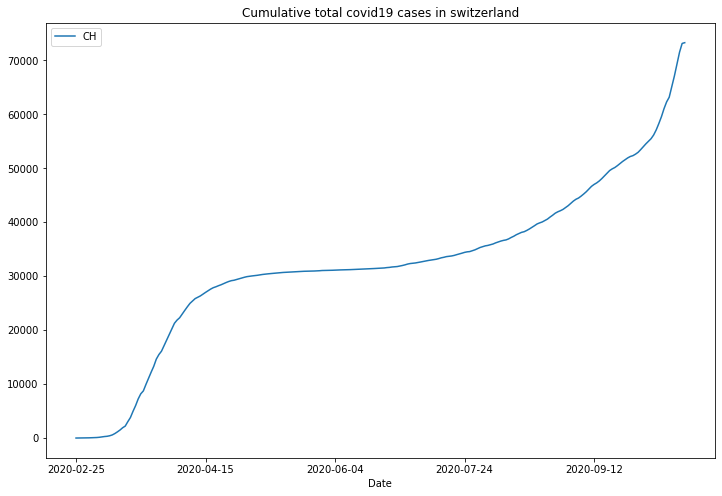

In [5]:
# Plotting the total cumulative cases
df = pd.DataFrame(covid_19_cases,columns=["Date","CH"])
plt.figure()
ax = df.set_index('Date').plot(kind="line",figsize=(12,8),title="Cumulative total covid19 cases in switzerland")
fig = ax.get_figure()
fig.savefig('cumulative.jpg')

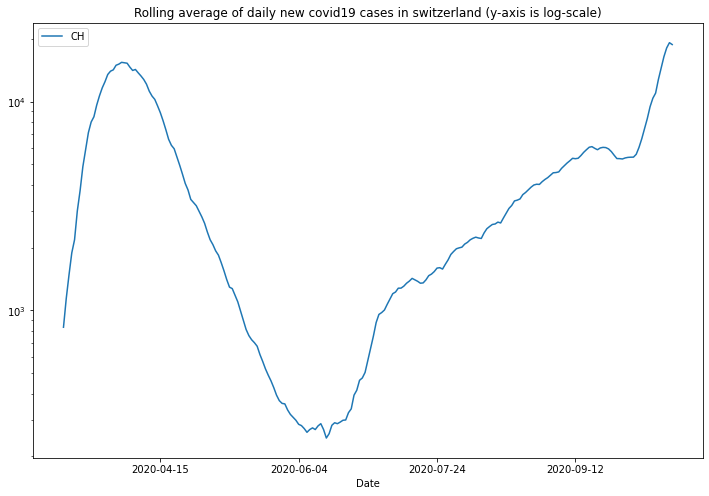

In [6]:
# Plotting the derivative
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(15).sum()
newcases = pd.concat([x,y],axis = 1)
ax = newcases.set_index('Date').plot(kind="line",figsize=(12,8),title="Rolling average of daily new covid19 cases in switzerland (y-axis is log-scale)",logy=True)
fig = ax.get_figure()
fig.savefig('diff.jpg')

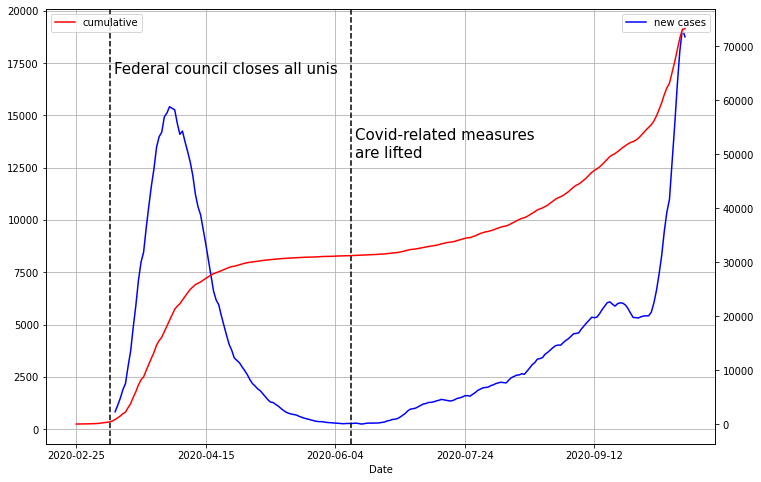

In [12]:
# Plotting the total cumulative cases together with the derivative
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(15).sum()
newcases = pd.concat([x,y],axis = 1)



ax1 = newcases.set_index('Date').plot(color="blue",kind="line",grid=True, label='New Cases',figsize=(12,8))
ax2 = df.set_index('Date').plot(color="red",kind="line",grid=True, label='Cumulative Cases',secondary_y=True,ax=ax1)


ax1.legend(["new cases"],loc=1)
ax2.legend(["cumulative"],loc=2)

ax1.axvline(13, color='k', linestyle='--',label="Interdiction des manifestations")
ax1.text(14.5,17000,"13 March \n Federal council closes all education",size=15)

ax1.axvline(106, color='k', linestyle='--',label="Interdiction des manifestations")
ax1.text(107.5,13000,"Covid-related measures \nare lifted",size=15)

plt.show()
fig = ax1.get_figure()
fig.savefig('annotated.jpg')